# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A
Two reasonable test statistics are 
$$T_1 = \frac{1}{n}\sum_{i=1}^nX_i$$
and 
$$T_2 = \frac{1}{n}\sum_{i=1}^n(X_i-6)^2$$
where $n=6115$

In [2]:
sample = np.array([7, 45, 181, 478, 829, 1112, 1343, 1033, 
                670, 286, 104, 24, 3])

t1_sample = np.sum(np.arange(13)*sample)/6115

t2_sample = np.sum(((np.arange(13)-6)**2) * sample)/6115

print(f"T_1 sample value: {t1_sample}")
print(f"T_2 sample value: {t2_sample}")

T_1 sample value: 5.769419460343418
T_2 sample value: 3.542436631234669


## Part B

In [3]:
null_samples = np.random.binomial(12, .5, (1000, 6115))

The exterior of the red lines in the two following histograms is the rejection region for a two-sided $\alpha=0.05$ significance test. The green line is the sample value of the test statistic

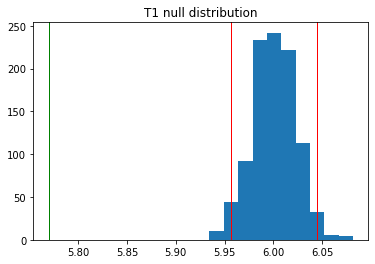

p value is: 0.0


In [4]:
# Histogram and rejection region
t1_null = np.sort(np.mean(null_samples, axis=1))
plt.hist(t1_null)
plt.title("T1 null distribution")

t1_lower_reject = (t1_null[25]+t1_null[24])/2
plt.axvline(t1_lower_reject, color='r', linestyle='solid', linewidth=1)

t1_upper_reject = (t1_null[975]+t1_null[974])/2
plt.axvline(t1_upper_reject, color='r', linestyle='solid', linewidth=1)


# p value computation
plt.axvline(t1_sample, color='g', linestyle='solid', linewidth=1)
insert_idx = np.searchsorted(t1_null, t1_sample)
p_value = (min(insert_idx, 1000-insert_idx)*2)/1000
plt.show()
print(f"p value is: {p_value}")

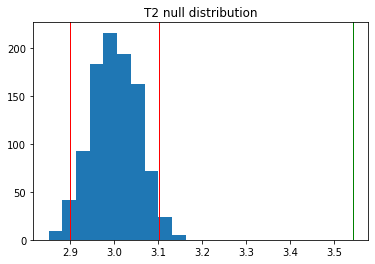

p value is: 0.0


In [5]:
# T2
t2_null = np.sort(np.mean((null_samples - 6)**2, axis=1))
plt.hist(t2_null)
plt.title("T2 null distribution")

t2_lower_reject = (t2_null[25]+t2_null[24])/2
plt.axvline(t2_lower_reject, color='r', linestyle='solid', linewidth=1)

t2_upper_reject = (t2_null[975]+t2_null[974])/2
plt.axvline(t2_upper_reject, color='r', linestyle='solid', linewidth=1)

# p value computation
plt.axvline(t2_sample, color='g', linestyle='solid', linewidth=1)
insert_idx = np.searchsorted(t2_null, t2_sample)
p_value = (min(insert_idx, 1000-insert_idx)*2)/1000
plt.show()
print(f"p value is: {p_value}")

For both test statistics, we get approximate p-values of 0. This means in both cases we can reject $H_0$ at significance level $\alpha=0.05$.

## Part C
One reason the null hypothesis may not hold is because of selection bias introduced by only considering families that have 12 children. For example, suppose each family $i$ adopts the strategy of having children until they reach $n_i$ boys where $n_i$ is typically less than six. Then the families that reach twelve children will have less than 50% boys. 